Found 257 files belonging to 9 classes.


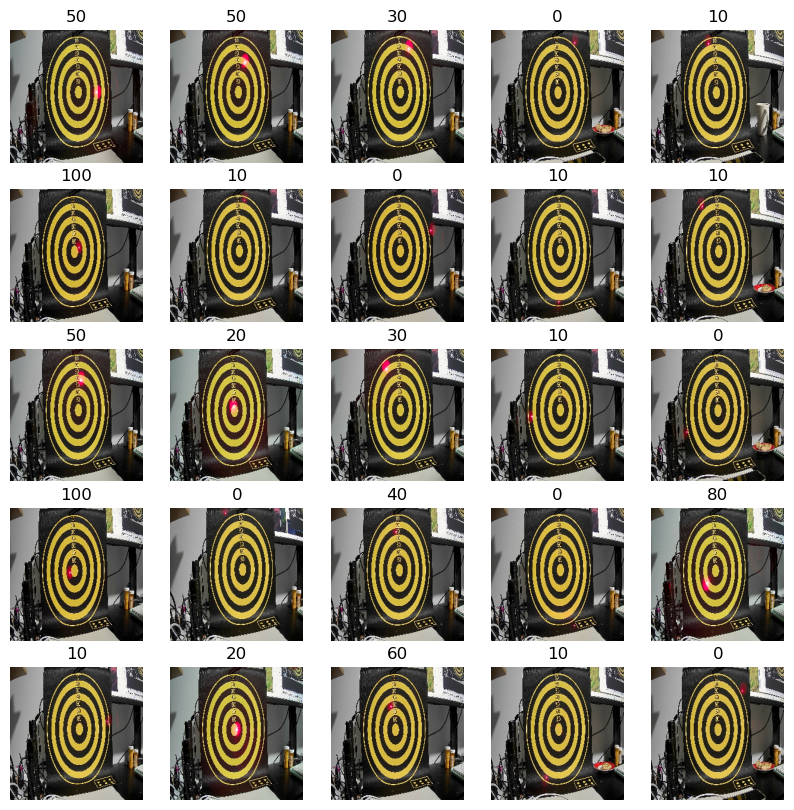

In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = ['0','10','20','30','40','50','60','80','100']

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='data/laserspots/train',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

image_batch, label_batch = next(iter(train_ds))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
plt.show()

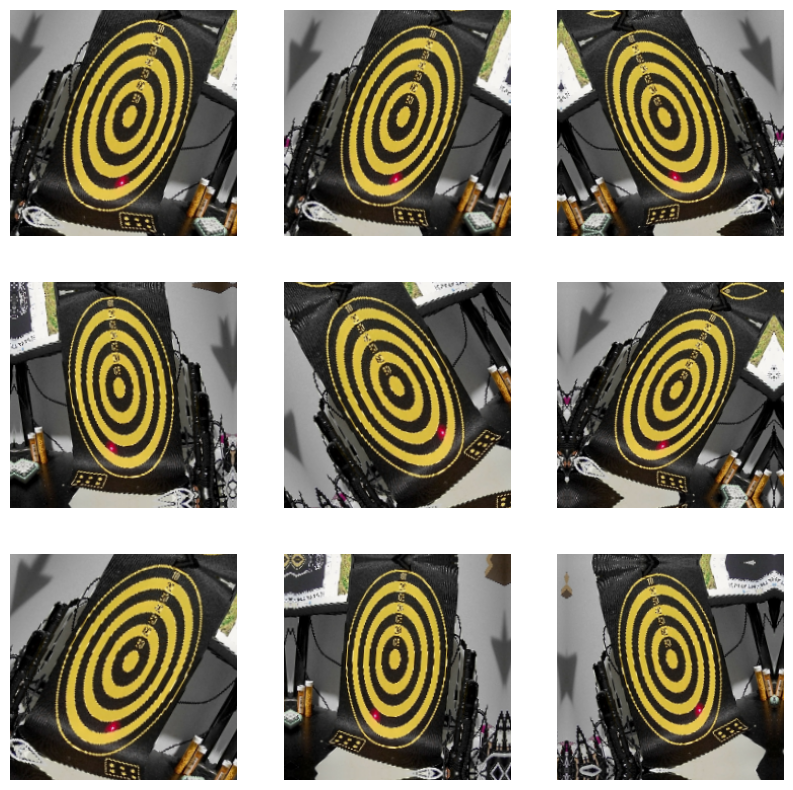

In [83]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                        input_shape=(img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [85]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,401 (24.59 MB)

 Trainable params: 6,447,401 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
epochs=45

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

hist = model.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.0991 - loss: 3.1392
Epoch 2/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.1385 - loss: 2.1901
Epoch 3/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.2047 - loss: 2.1701
Epoch 4/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.2108 - loss: 2.1494
Epoch 5/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.1710 - loss: 2.1218
Epoch 6/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.1175 - loss: 2.1130
Epoch 7/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1197 - loss: 2.1360
Epoch 8/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.1911 - loss: 2.1098
Epoch 9/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.1178 - loss: 2.1639
Epoch 10/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1188 - loss: 2.1444
Epoch 11/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.2075 - loss: 2.0747
Epoch 12/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1454 - lo

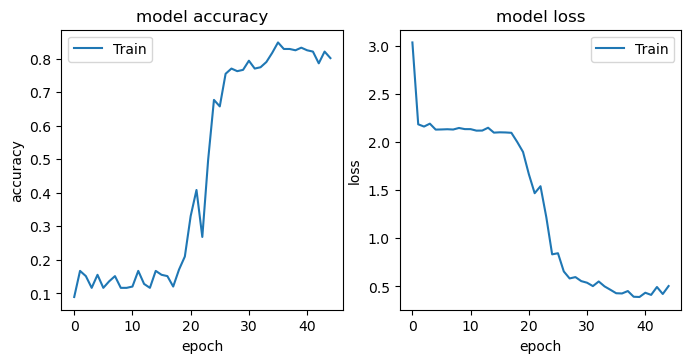

In [89]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.subplot(222)
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [91]:
score = model.evaluate(image_batch, label_batch, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

Test loss: 0.23
Test accuracy: 0.94


In [93]:
model.save('models/lasershot.keras')
# model = tf.keras.models.load_model('models/lasershot.keras')

Found 30 files belonging to 9 classes.
(30, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


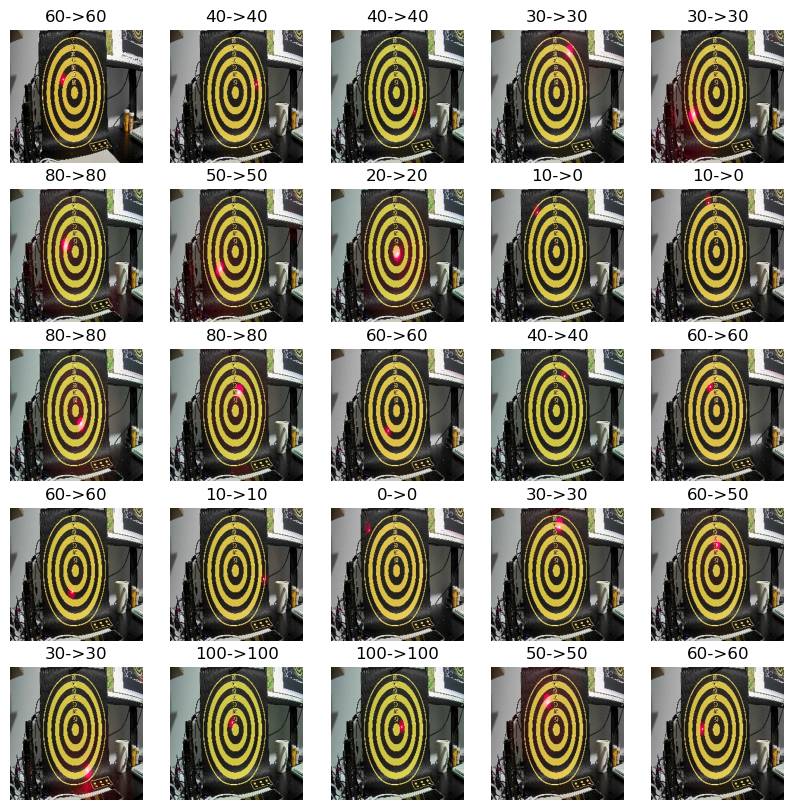

(30, 224, 224, 3)


In [95]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_height = 224
img_width = 224

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='data/laserspots/test',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

image_batch, label_batch = next(iter(test_ds))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

print(image_batch.shape)

predictions = model.predict(image_batch)
predictions = tf.nn.softmax(predictions).numpy()

class_names = ['0','10','20','30','40','50','60','80','100']

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(class_names[label_batch[i]]+'->'+class_names[np.argmax(predictions[i])])
    plt.axis("off") 
plt.show()

print(image_batch.shape)